In [1]:
import pandas as pd
from pathlib import Path
import os
import seaborn as sns
import folium
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
dir_path = os.path.dirname(os.path.abspath("__file__")) + "/data"
dfs = {}
for file in os.listdir(dir_path):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        #print('Filename :', filename)
        file_name = os.path.join(dir_path, filename)
        df = pd.read_csv(file_name)
        dfs[f'{filename}'] = df
        print('No of rows', df.shape[0])
        print('Column names\n', list(df))
        print('\n\n')
        

No of rows 84090
Column names
 ['Job.ID', 'Provider', 'Status', 'Slug', 'Title', 'Position', 'Company', 'City', 'State.Name', 'State.Code', 'Address', 'Latitude', 'Longitude', 'Industry', 'Job.Description', 'Requirements', 'Salary', 'Listing.Start', 'Listing.End', 'Employment.Type', 'Education.Required', 'Created.At', 'Updated.At']



No of rows 12370
Column names
 ['Applicant.ID', 'Job.ID', 'Title', 'Position', 'Company', 'City', 'State.Name', 'State.Code', 'Industry', 'View.Start', 'View.End', 'View.Duration', 'Created.At', 'Updated.At']



No of rows 84090
Column names
 ['Unnamed: 0', 'Job.ID', 'text']



No of rows 6560
Column names
 ['Applicant.ID', 'Position.Of.Interest', 'Created.At', 'Updated.At']



No of rows 8653
Column names
 ['Applicant.ID', 'Position.Name', 'Employer.Name', 'City', 'State.Name', 'State.Code', 'Start.Date', 'End.Date', 'Job.Description', 'Salary', 'Can.Contact.Employer', 'Created.At', 'Updated.At']





In [3]:
dfs.keys()

dict_keys(['Combined_Jobs_Final.csv', 'Job_Views.csv', 'job_data.csv', 'Positions_Of_Interest.csv', 'Experience.csv'])

In [4]:
combined_jobs = dfs['Combined_Jobs_Final.csv']
combined_jobs

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84085,82,1,open,san-francisco-ca-national-japanese-american-hi...,Book Keeper @ National Japanese American Histo...,Book Keeper,National Japanese American Historical Society,San Francisco,California,CA,...,Office Administration,NJAHS stands for National Japanese American Hi...,NaN,20.00,NaN,NaN,Part-Time,NaN,2013-03-20 06:35:01 UTC,2014-08-16 15:35:27 UTC
84086,83,1,open,larkspur-ca-emporio-rulli-kitchen-staff-chef,Kitchen Staff/Chef @ Emporio Rulli,Kitchen Staff/Chef,Emporio Rulli,Larkspur,California,CA,...,Food and Beverages,Weekend Brunch Line Cook \r\n● Other shifts ma...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-03-20 08:06:43 UTC,2014-08-16 15:35:27 UTC
84087,84,1,open,san-francisco-ca-onigilly-driver-84,Driver @ Onigilly,Driver,Onigilly,San Francisco,California,CA,...,Food and Beverages,ONIGILLY (Japanese rice ball wraps) seeks outg...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-03-12 01:47:13 UTC,2014-08-16 15:35:27 UTC
84088,88,1,open,san-francisco-ca-machka-restaurants-corp-line-...,Line Cook @ Machka Restaurants Corp.,Line Cook,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean restaurant in F...,NaN,13.00,NaN,NaN,Part-Time,NaN,2013-07-16 08:55:22 UTC,2014-08-16 15:35:28 UTC


In [5]:
list(combined_jobs)

['Job.ID',
 'Provider',
 'Status',
 'Slug',
 'Title',
 'Position',
 'Company',
 'City',
 'State.Name',
 'State.Code',
 'Address',
 'Latitude',
 'Longitude',
 'Industry',
 'Job.Description',
 'Requirements',
 'Salary',
 'Listing.Start',
 'Listing.End',
 'Employment.Type',
 'Education.Required',
 'Created.At',
 'Updated.At']

In [6]:
job_views = dfs['Job_Views.csv']
job_views

,Applicant.ID,Job.ID,Title,Position,Company,City,State.Name,State.Code,Industry,View.Start,View.End,View.Duration,Created.At,Updated.At
0,10000,73666,Cashiers & Valets Needed! @ WallyPark,Cashiers & Valets Needed!,WallyPark,Newark,New Jersey,NJ,NaN,2014-12-12 20:12:35 UTC,2014-12-12 20:31:24 UTC,1129.0,2014-12-12 20:12:35 UTC,2014-12-12 20:12:35 UTC
1,10000,96655,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's,Garden City,New York,NY,NaN,2014-12-12 20:08:50 UTC,2014-12-12 20:10:15 UTC,84.0,2014-12-12 20:08:50 UTC,2014-12-12 20:08:50 UTC
2,10001,84141,Part Time Showroom Sales / Cashier @ Grizzly I...,Part Time Showroom Sales / Cashier,Grizzly Industrial Inc.,Bellingham,Washington,WA,NaN,2014-12-12 20:12:32 UTC,2014-12-12 20:17:18 UTC,286.0,2014-12-12 20:12:32 UTC,2014-12-12 20:12:32 UTC
3,10002,77989,Event Specialist Part Time @ Advantage Sales &...,Event Specialist Part Time,Advantage Sales & Marketing,Simpsonville,South Carolina,SC,NaN,2014-12-12 20:39:23 UTC,2014-12-12 20:42:13 UTC,170.0,2014-12-12 20:39:23 UTC,2014-12-12 20:39:23 UTC
4,10002,69568,Bonefish - Kitchen Staff @ Bonefish Grill,Bonefish - Kitchen Staff,Bonefish Grill,Greenville,South Carolina,SC,NaN,2014-12-12 20:43:25 UTC,2014-12-12 20:43:58 UTC,33.0,2014-12-12 20:43:25 UTC,2014-12-12 20:43:25 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12365,9997,166,Server @ A La Turca,Server,A La Turca,San Francisco,California,CA,Food and Beverages,2014-12-12 21:00:10 UTC,2014-12-12 21:00:25 UTC,14.0,2014-12-12 21:00:10 UTC,2014-12-12 21:00:10 UTC
12366,9997,531,Server @ Oola Restaurant & Bar,Server,Oola Restaurant & Bar,San Francisco,California,CA,Food and Beverages,2014-12-12 21:00:47 UTC,2014-12-12 21:00:58 UTC,10.0,2014-12-12 21:00:47 UTC,2014-12-12 21:00:47 UTC
12367,9997,33,Server @ Haven,Server,Haven,Oakland,California,CA,Food and Beverages,2014-12-12 21:01:20 UTC,2014-12-12 21:01:26 UTC,5.0,2014-12-12 21:01:20 UTC,2014-12-12 21:01:20 UTC
12368,9997,517,Server @ SAM's Diner,Server,SAM's Diner,San Francisco,California,CA,Food and Beverages,2014-12-12 21:02:07 UTC,2014-12-12 21:02:17 UTC,10.0,2014-12-12 21:02:07 UTC,2014-12-12 21:02:07 UTC


In [7]:
jobs_data = dfs['job_data.csv']
jobs_data

,Unnamed: 0,Job.ID,text
0,0,111,server tacolici palo alto part time tacolici f...
1,1,113,kitchen staff chef claud lane san francisco pa...
2,2,117,bartend machka restaur corp. san francisco par...
3,3,121,server teriyaki hous brisban part time serv fo...
4,4,127,kitchen staff chef rosa mexicano sunset lo ang...
...,...,...,...
84085,84085,82,book keeper nation japanes american histor soc...
84086,84086,83,kitchen staff chef emporio rulli larkspur part...
84087,84087,84,driver onigilli san francisco part time onigil...
84088,84088,88,line cook machka restaur corp. san francisco p...


In [8]:
experience = dfs['Experience.csv']
experience

,Applicant.ID,Position.Name,Employer.Name,City,State.Name,State.Code,Start.Date,End.Date,Job.Description,Salary,Can.Contact.Employer,Created.At,Updated.At
0,10001,Account Manager / Sales Administration / Quali...,Barcode Resourcing,Bellingham,Washington,WA,2012-10-15,NaN,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
1,10001,Electronics Technician / Item Master Controller,Ryzex Group,Bellingham,Washington,WA,2001-12-01,2012-04-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
2,10001,Machine Operator,comptec inc,Custer,Washington,WA,1997-01-01,1999-01-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
3,10003,maintenance technician,Winn residental,washington,District of Columbia,DC,NaN,NaN,"Necessary maintenance for ""Make Ready"" Plumbin...",10.00,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC
4,10003,Electrical Helper,michael and son services,alexandria,Virginia,VA,NaN,NaN,repair and services of electrical construction,NaN,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,9997,Server,Biscuits and blues,San Francisco,California,CA,2014-04-08,NaN,I am a cocktail waitress. Its a high volume bl...,11.00,False,2014-12-12 19:09:40 UTC,2014-12-12 20:22:16 UTC
8649,9997,server,Knickerbocker Bar and Grill,New York,New York,NY,2011-06-01,2014-01-01,It was a popular restaurant in the west villag...,5.00,False,2014-12-12 19:09:40 UTC,2014-12-12 20:22:16 UTC
8650,9997,Server/Cocktail Server/Bartender,The Park,New York,New York,NY,2010-04-01,2011-10-01,"I was a dining room server, a cocktail server,...",4.65,True,2014-12-12 20:22:16 UTC,2014-12-12 20:54:21 UTC
8651,9997,Server/cocktail server/bartender,The River Room,New York,New York,NY,2008-08-01,2010-10-01,This was an establishment that majority of the...,25.00,True,2014-12-12 20:54:21 UTC,2014-12-12 20:54:21 UTC


In [9]:
positions_interest = dfs['Positions_Of_Interest.csv']
positions_interest

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At
0,10003,security officer,2014-12-12 21:20:54 UTC,2014-12-12 21:20:54 UTC
1,10007,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
2,10007,Bartender,2014-08-14 15:56:44 UTC,2015-02-19 23:21:28 UTC
3,10008,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
4,10008,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC
...,...,...,...,...
6555,9995,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
6556,9996,Security,2014-12-12 19:06:28 UTC,2014-12-12 19:06:28 UTC
6557,9997,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
6558,9997,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC


# EDA

Check NA's

Check data types

Key Findings

1. NA values in Industry and Salary
2. Unique Identifiers - 
   Combined_Jobs_Final - Job.ID

In [ ]:
combined_jobs.isna().any()

In [ ]:
combined_jobs.dtypes

# Visualize data

## Salary Range by Industry

### Note: Missing industry and salary values are discarded

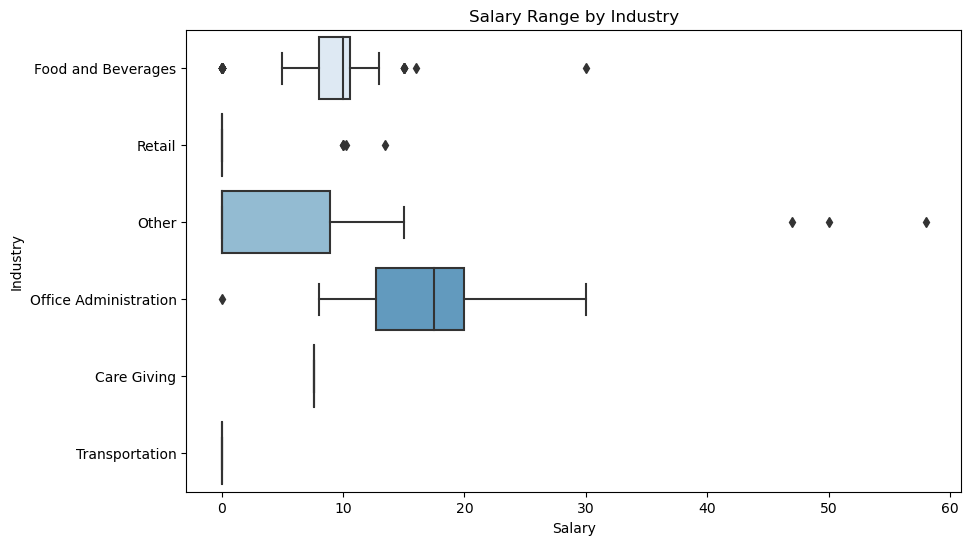

In [10]:
job_master = combined_jobs.dropna(subset=['Salary', 'Industry'])

#job_master = combined_jobs.copy()
#job_master['Industry'] = job_master['Industry'].fillna('Unknown')

plt.figure(figsize=(10, 6))
sns.boxplot( x=job_master["Salary"], y=job_master['Industry'], palette="Blues");

# Add labels and title
plt.xlabel("Salary")
plt.ylabel("Industry")
plt.title("Salary Range by Industry")

# Show the plot
plt.show()

# No. of Jobs by Industry

### Note: Missing industry  values are discarded

In [11]:
jobs_by_industry = job_master.groupby('Industry').agg({'Job.ID': ['count']})

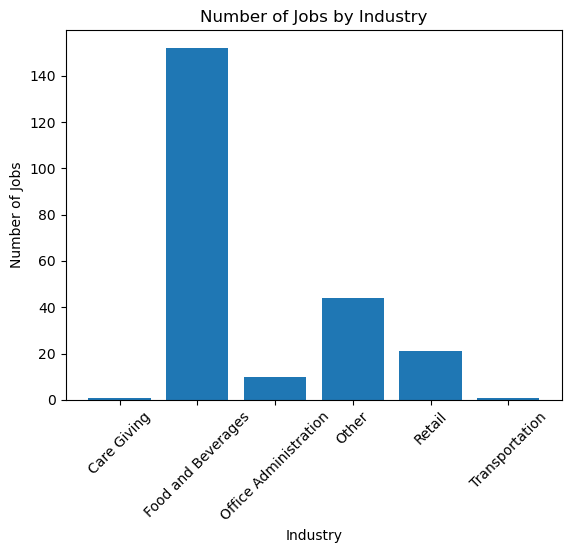

In [12]:
# Reset column names for easier access
jobs_by_industry.columns = ['Count']

# Plot the bar graph
plt.bar(jobs_by_industry.index, jobs_by_industry['Count'])

# Add labels and title
plt.xlabel("Industry")
plt.ylabel("Number of Jobs")
plt.title("Number of Jobs by Industry")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Locations of Jobs

In [13]:
combined_jobs1 = combined_jobs.loc[(combined_jobs['Latitude'] != 0) & (combined_jobs['Longitude'] != 0)]
combined_jobs1
# Create a map centered on a location
map_center = [combined_jobs1['Latitude'].mean(), combined_jobs1['Longitude'].mean()]  # Centered based on average coordinates
zoom_level = 5  # Adjust the zoom level as desired
map_obj = folium.Map(location=map_center, zoom_start=zoom_level)

# Add markers for each location
for _, row in combined_jobs1.iloc[:1000].iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=row['City']).add_to(map_obj)

# Display the map
map_obj

# Calculate number of jobs for each industry and employment type



/Users/arjun/miniforge3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


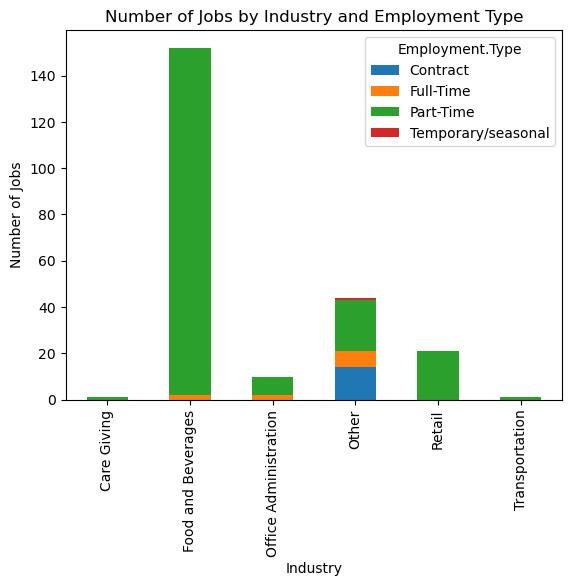

In [14]:
# Calculate number of jobs for each industry and employment type
job_master['Employment.Type'] = job_master['Employment.Type'].fillna('Unknown')
jobs_by_industry = job_master.groupby(['Industry', 'Employment.Type']).size().unstack()

# Plot the bar graph
jobs_by_industry.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Industry')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs by Industry and Employment Type')

# Show the plot
plt.show()

# Most No. of Jobs in a city

In [15]:
gdf = combined_jobs.groupby('City').agg({'Job.ID': ['count']})
gdf.columns = ['Jobs Count']
gdf

,Jobs Count
City,
Abbeville,2
Abbottstown,2
Aberdeen,37
Abilene,20
Abingdon,35
...,...
Zephyr,1
Zephyrhills,19
Zion,2


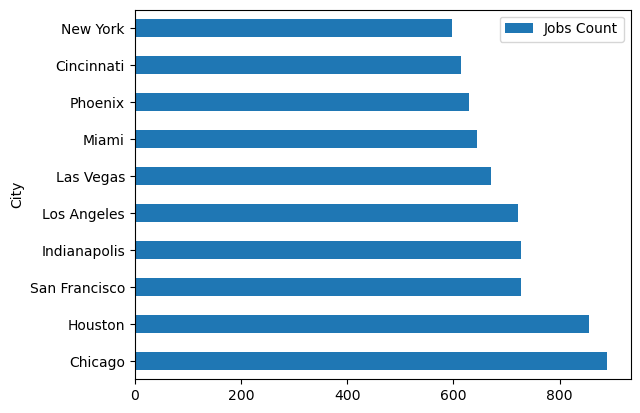

In [16]:
gdf.sort_values(by=['Jobs Count'], ascending=[False]) \
.iloc[:10] \
.plot.barh();

## Applicants Viewing Duration and Interests
### Understand which industries, positions, or companies attract more applicant attention.

#### Note: Scale of View counts is not high to see in the plot.

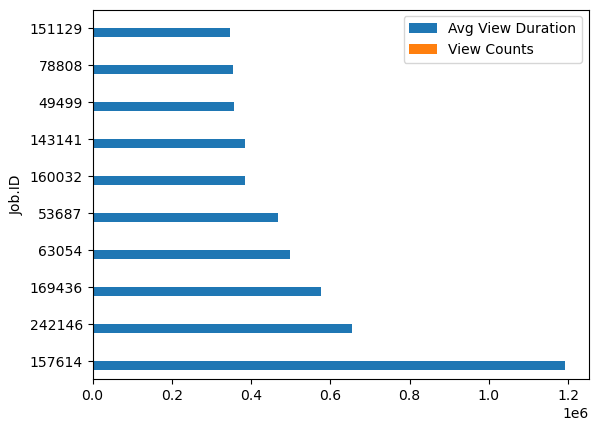

In [17]:
jobs_viewed_by_duration = job_views.groupby(['Job.ID']).agg({'View.Duration': ['mean', 'count']})
# Reset column names for easier access
jobs_viewed_by_duration.columns = ['Avg View Duration' ,'View Counts']
jobs_viewed_by_duration
jobs_viewed_by_duration = jobs_viewed_by_duration.sort_values(by='Avg View Duration', ascending=False)
jobs_viewed_by_duration \
.iloc[:10] \
.plot.barh();

## Positions which are most viewed by applicant's 

In [45]:
def jobs_positions_property_helper(col):
    # Group the DataFrame by 'Job category' and aggregate the 'Job position' column as a list
    df_grouped = job_views.groupby(['Job.ID'])[col].apply(list).reset_index()

    # Rename the aggregated column to 'Positions'
    #df_grouped.rename(columns={'Position': 'Positions'}, inplace=True)

    list_of_lists = df_grouped[df_grouped['Job.ID']\
                               .isin(jobs_viewed_by_duration.iloc[:10].index.values.tolist())][f'{col}']\
                                .values.tolist()
    flattened_list = [item for sublist in list_of_lists for item in sublist]
    flattened_list = list(set(flattened_list))
    
    return flattened_list

jobs_positions_property_helper('Position')

['Part Time Telephone Research Interviewer',
 'Retail Sales Consultant',
 'Teller (PT)',
 'T-Mobile Sales Representative',
 'Hotel Housekeeping Team Member',
 'Certified Nursing Assistant CNA',
 'Service Associate',
 'ENTRY LEVEL MEDICAL TRANSCRIPTIONIST',
 'Dock Worker Part-Time',
 'CHARLOTTE CHILDREN S MINISTRY COORDINATOR']

## Companies attract more applicant attention.
### missing values of Company in data

In [46]:
jobs_positions_property_helper('Company')

[nan,
 'ABF Freight System, Inc',
 'Union First Market Bank',
 'Holiday Inn- Independently Owned & Operated',
 'Princeton Data Source, LLC (PDS)',
 'Brookdale',
 'AT&T Retail',
 'Redemption World Outreach Center',
 'Med Trans Inc.',
 'Winn-Dixie']

## Applicants View Counts and View Duration of Job Posting

In [28]:
job_views_filt = jobs_viewed_by_duration.sort_values(by=['View Counts'], ascending=False)\
.loc[jobs_viewed_by_duration['View Counts'] > 10].reset_index()
job_views_filt

,Job.ID,Avg View Duration,View Counts
0,221890,164.058824,102
1,231297,573.430233,86
2,48285,3553.659091,44
3,153198,96.139535,43
4,153197,87946.947368,38
5,48200,41.027027,37
6,48284,411.638889,36
7,153199,184.121212,33
8,222383,18589.937500,32
9,227061,441.566667,30


## Distribution of View Duration for each position


### View duration of top 5 positions basis highest view counts


#### It's highly skewed



/Users/arjun/miniforge3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


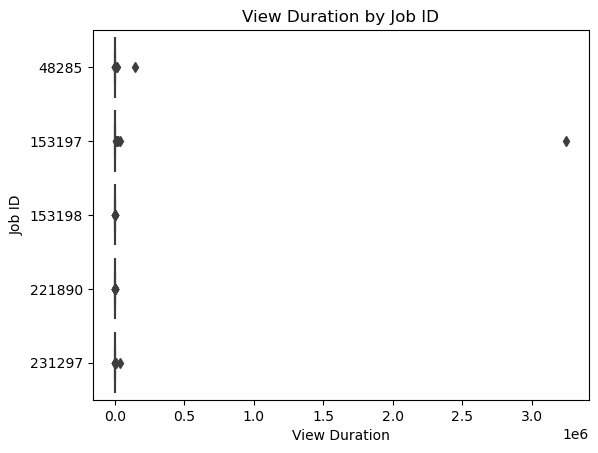

In [29]:
job_views_filt = job_views[job_views['Job.ID'].isin([221890, 231297,48285, 153198, 153197])]
job_views_filt['Job.ID'] = job_views_filt['Job.ID'].apply(str)
sns.boxplot(data=job_views_filt, x='View.Duration', y='Job.ID')
# Add scatter points using stripplot
#sns.stripplot(data=job_views_filt, x='View.Duration', y='Job.ID', color='black', jitter=True)

# Set the plot title and axes labels
plt.title('View Duration by Job ID')
plt.xlabel('View Duration')
plt.ylabel('Job ID')

# Show the plot
plt.show()

##  Let's take 2-3 job positions with similar range 

/Users/arjun/miniforge3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


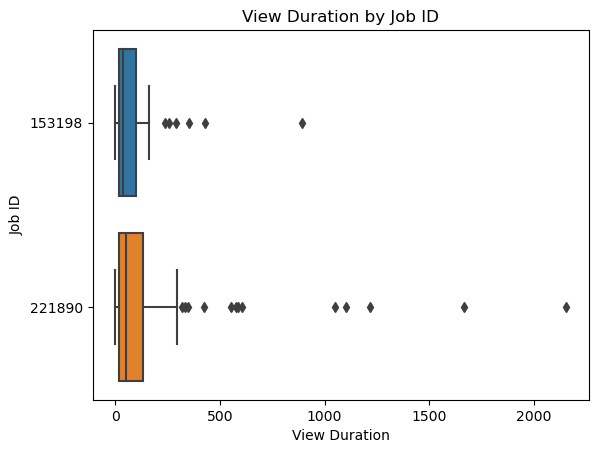

In [30]:
job_views_filt = job_views[job_views['Job.ID'].isin([221890, 153198])]
job_views_filt['Job.ID'] = job_views_filt['Job.ID'].apply(str)
sns.boxplot(data=job_views_filt, x='View.Duration', y='Job.ID')
# Add scatter points using stripplot
#sns.stripplot(data=job_views_filt, x='View.Duration', y='Job.ID', color='black', jitter=True)

# Set the plot title and axes labels
plt.title('View Duration by Job ID')
plt.xlabel('View Duration')
plt.ylabel('Job ID')

# Show the plot
plt.show()

# Positions of Interest

##  Identify popular job roles among the applicants.



In [50]:
list(experience)

['Applicant.ID',
 'Position.Name',
 'Employer.Name',
 'City',
 'State.Name',
 'State.Code',
 'Start.Date',
 'End.Date',
 'Job.Description',
 'Salary',
 'Can.Contact.Employer',
 'Created.At',
 'Updated.At']

In [54]:
position_preferences = positions_interest['Position.Of.Interest'].unique()
print(position_preferences)


['security officer' 'Server' 'Bartender' 'Host' 'Barista' 'Receptionist'
 'Book Keeper' 'Customer Service Rep' 'Dishwasher' 'Office Manager'
 'Designer' 'Office Assistant' 'Data Entry' 'Connect Transportation'
 'Clerical, retail,' 'Sales Rep' 'Security Guard' 'security'
 'Data Entry Operator' 'Security officer' 'Entry Level Security Officer'
 'youth worker / resolving employee conflict in the workplace.' 'Security'
 'Stock' 'part-time administrative assistant or human resource support'
 'Line Cook' 'Chef' 'Clerical support' 'Security guard' 'Babysitter '
 'Nanny' 'Security Officer' 'stocker' 'casiher' 'part time'
 'customer service' 'Project Manager' 'Research Associate'
 'Director, Clinical and Regulatory' 'QA Director'
 'overnight position if available' 'stock' 'Work from home Typing'
 'cleaner/janitor' 'Writer' 'Editor' 'Trainer/Teacher' 'Editing'
 'Proofreader' 'driver' 'delivery' 'installer' 'camera operator'
 'medical supply technician' 'clerical' 'call center' 'warehouse'
 'stoc

## Spellings can be incorrect, there can be similar positions


## Create a mapping to group similar positions and account for case sensitivity, spell errors based on fuzzy matching technique

In [55]:
from fuzzywuzzy import fuzz

def is_nan(x):
    return x != x

def create_position_mapping(raw_positions):
    mapping = {}
    
    for position in raw_positions:
        if is_nan(position):
            continue
        position = position.strip()
        found = False
        
        for key in mapping.keys():
            if fuzz.ratio(position.lower(), key.lower()) >= 90:
                mapping[key].append(position)
                found = True
                break
        
        if not found:
            mapping[position] = [position]
    
    return mapping



position_mapping = create_position_mapping(position_preferences)

# Print the mapping
for key, values in position_mapping.items():
    print(f"{key} - {', '.join(values)}")



security officer - security officer, Security officer, Security Officer, security officer, Security Officer, SECURITY OFFICER
Server - Server
Bartender - Bartender
Host - Host
Barista - Barista
Receptionist - Receptionist, receptionist
Book Keeper - Book Keeper, book keeper
Customer Service Rep - Customer Service Rep
Dishwasher - Dishwasher
Office Manager - Office Manager, office manager
Designer - Designer
Office Assistant - Office Assistant, office assistant, Office Assistant
Data Entry - Data Entry, Data entry, data entry, Data entry, Data Entry, DATA ENTRY
Connect Transportation - Connect Transportation
Clerical, retail, - Clerical, retail,
Sales Rep - Sales Rep, sales rep
Security Guard - Security Guard, Security guard, security guard, security guard
security - security, Security, security, Security
Data Entry Operator - Data Entry Operator, data entry operator
Entry Level Security Officer - Entry Level Security Officer
youth worker / resolving employee conflict in the workplace. 

In [56]:
position_mapping['security'].append('securtiy')
position_mapping['photography'].append('photographer')

position_mapping.pop('photographer', None)
position_mapping.pop('securtiy', None)

['securtiy']

In [57]:
positions_interest['new_positions_of_interest'] = positions_interest['Position.Of.Interest'].map(lambda x: next((k for k, v in position_mapping.items() if x.strip().lower() in v), x) if not is_nan(x) else x)
positions_interest

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At,new_positions_of_interest
0,10003,security officer,2014-12-12 21:20:54 UTC,2014-12-12 21:20:54 UTC,security officer
1,10007,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC,Server
2,10007,Bartender,2014-08-14 15:56:44 UTC,2015-02-19 23:21:28 UTC,Bartender
3,10008,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC,Host
4,10008,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC,Barista
...,...,...,...,...,...
6555,9995,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC,Server
6556,9996,Security,2014-12-12 19:06:28 UTC,2014-12-12 19:06:28 UTC,security
6557,9997,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC,Server
6558,9997,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC,Barista


In [58]:
position_preference_counts = positions_interest['new_positions_of_interest'].value_counts()
position_preference_counts

Customer Service Rep    1109
Receptionist            1071
Sales Rep                556
Server                   531
Host                     524
                        ... 
lab tech                   1
Community Manager          1
courtesy clerk             1
journalist                 1
pets                       1
Name: new_positions_of_interest, Length: 672, dtype: int64

In [59]:
position_preference_df = position_preference_counts.to_frame('counts')
position_preference_df = position_preference_df.loc[position_preference_df['counts'] > 30]
position_preference_df['counts'].unique()

array([1109, 1071,  556,  531,  524,  495,  415,  186,  174,  134,   79,
         57,   56,   46,   33])

<Figure size 1000x600 with 0 Axes>

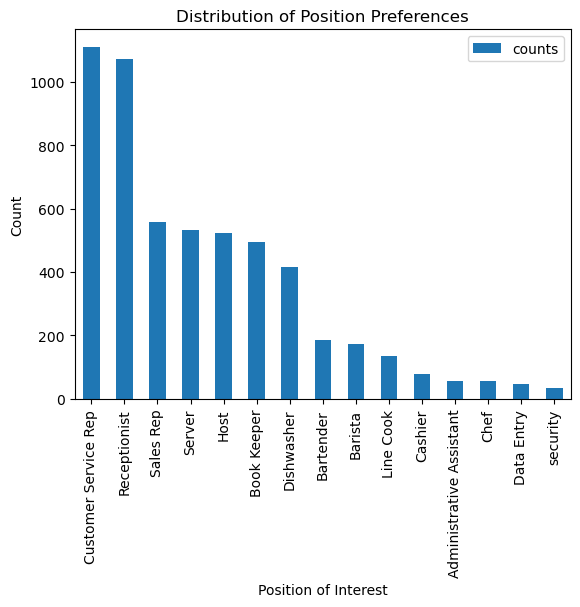

In [60]:
# Plot the position preference counts
plt.figure(figsize=(10, 6))
position_preference_df.plot(kind='bar')
plt.xlabel('Position of Interest')
plt.ylabel('Count')
plt.title('Distribution of Position Preferences')
plt.show()
